# Prediction of CO2 emissions from country-specific data

## A Machine Learning project
*** 

# Stage 2: Data exploration and visualization
***

## Notebook summary - Stage 2: Data exploration and visualization

**Aim of this notebook:**  
The subject of this notebook is to gain first data insights from descriptive statistics, visualize relevant dependencies and identify global trends. This is especially necessary for the proper choice of relevant/important features and of suitable machine learning algorithms for predictive analysis.

**Input:**  
Cleaned dataset from the csv data file (output of Stage 1 of the project)

**Output:**  
Plots, visualizations, summaries, trends, insights, conclusions

**Programming language:**  
Python 3.7

**Libraries used in this notebook:**  
seaborn, matplotlib, pandas, numpy

***


 ## Data source 
The used data comes from the Climate Change Data of the World Bank Group, which provides country-specific data on parameters such as CO2 emissions, energy use, population count, urban population, cereal yield, nationally terrestrial protected areas, GDP, GNI, etc.

The dataset is publicly available at https://datacatalog.worldbank.org/dataset/climate-change-data and licenced under the Creative Commons Attribution 4.0 International license.

***


 ## 1. Notebook Setup
Libraries and dataset import:

In [215]:
# import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import the cleaned dataset from a csv file
data = pd.read_csv(r'data_cleaned.csv')

 ## 2. Global overview of the available data
A global overview of the imported data yields the following insight

In [218]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1700, 18)

In [220]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
pop_urb_aggl_perc      float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

In [222]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


country  year  cereal_yield  fdi_perc_gdp  en_per_gdp  en_per_cap  \
0     AGO  1991         417.4      5.449515  179.271884  565.451027   
1     AGO  1992         397.0      4.982460  193.632183  550.548264   
2     AGO  1993         267.8      5.715529  266.318379  551.688878   
3     AGO  1994         298.4      4.195018  260.830190  541.553067   
4     AGO  1995         402.2      9.374417  237.623934  528.386164   

     co2_ttl  co2_per_cap  co2_per_gdp  pop_urb_aggl_perc  prot_area_perc  \
0   4367.397     0.409949   129.971142          15.290728       12.399822   
1   4418.735     0.401597   141.244823          15.660630       12.399823   
2   5801.194     0.510141   246.261769          16.025739       12.399823   
3   3890.687     0.331321   159.575256          16.065941       12.399824   
4  11012.001     0.909699   409.106543          16.134424       12.399825   

            gdp  gni_per_cap  under_5_mort_rate  pop_growth_perc         pop  \
0  1.219375e+10        820.0              239.1         3.034866  10653515.0   
1  5.779394e+09        470.0              235.3         3.226990  11002910.0   
2  5.285600e+09        310.0              231.1         3.297243  11371750.0   
3  4.059577e+09        190.0              226.3         3.212170  11742960.0   
4  5.039535e+09        320.0              221.5         3.037335  12105105.0   

   urb_pop_growth_perc      urb_pop  
0             6.687032  4099472.572  
1             6.750459  4385759.926  
2             6.700777  4689709.700  
3             6.503667  5004849.552  
4             6.223936  5326246.200


## 3. Used feature/column abbreviations

The features/columns were given in Stage 1 clearer abbreviations in order to ensure easies understanding, representation and coding. These are listed in the following table together with the corresponding units:

| Variable name         | Description                                    | Unit                                   |
|-----------------------|------------------------------------------------|----------------------------------------|
| cereal_yield          | Cereal yield                                   | kg per hectare                         |
| fdi_perc_gdp          | Foreign direct investment, net inflows         | % of GDP                               |
| en_per_gdp            | Energy use per units of GDP                    | kg oil eq./$1,000 of 2005 PPP $        |
| en_per_cap            | Energy use per capita                          | kilograms of oil equivalent            |
| co2_ttl               | CO2 emissions, total                           | KtCO2                                  |
| co2_per_cap           | CO2 emissions per capita                       | metric tons                            |
| co2_per_gdp           | CO2 emissions per units of GDP                 | kg/$1,000 of 2005 PPP $                |
| pop_urb_aggl_perc     | Population in urban agglomerations >1million   | %                                      |
| prot_area_perc        | Nationally terrestrial protected areas         | % of total land area                   |
| gdp                   | Gross Domestic Product (GDP)                   | $                                      |
| gni_per_cap           | GNI per capita                                 | Atlas $                                |
| under_5_mort_rate     | Under-five mortality rate                      | per 1,000                              |
| pop_growth_perc       | Population growth                              | annual %                               |
| pop                   | Population                                     | 1                                      |
| urb_pop_growth_perc   | Urban population growth                        | annual %                               |
| urb_pop               | Urban population                               | 1                                      |


## 4. Define the Hypothesis to Be Investigated

The data series available can be summarized into the following country-specific parameter categories:

- Various emissions of greenhouse gases: CO₂, CH₄, N₂O, others
- Population-specific parameters: population count, urban population, population growth, etc.
- Country economic indicators: GDP, GNI, Foreign Direct Investment, etc.
- Land-related parameters: cereal yield, agricultural land, nationally terrestrial protected areas, etc.
- Climate data: precipitation, natural disasters, etc.
- Energy use
- Counts of certain types of medical personnel
- etc.

### Initial Goal of the Project

The initial project goal was defined during Stage 1:

> **Analyze the relationships among the variable categories and evaluate the contribution of factors like country economy, energy use, land use, etc. on greenhouse gas emissions, precipitations, etc. Finally, develop a predictive machine learning model capable of predicting climate-related data or emissions from the other country-specific parameters.**

Many of the features relating to climate data and emissions had to be removed in Stage 1 due to a large amount of missing values.

### Focused Hypothesis

It is generally considered that CO₂ emissions are an important contributor to climate change. For a given country and year, these emissions can theoretically be influenced by energy use, country's population, economy, etc. Based on this and the available data, the hypothesis to be tested can be stated as:

> **The hypothesis to be tested:**  
> CO₂ emissions depend on the rest of the country-specific features available in the dataset (such as energy use, various population metrics, GDP, FDI, cereal yield, etc.) and can be predicted from these.

- In this analysis, **CO₂ emissions** will be treated as the **Dependent Variable (DV)**.
- The investigation will focus on how and whether CO₂ emissions depend on the other available features/variables.

***

 ## 5. Feature engineering
The available columns reveal that the features representing CO2 emissions and energy use have three different reference values:

  - per capita: co2_per_cap and en_per_cap
  - per unit of GDP: co2_per_gdp and en_per_gdp
  - total values: co2_ttl
    
Since the energy use is not available as a total value, an additional column will be derived by multiplying the value referred to a unit of GDP 'en-er_gdp' with the column 'gdp' and dividing by 1000 (The energy use per unit of GDP is defined in the dataset documentation as the energy use in kilograms of oil equivalent per $1000 of GDP [kg oil eq./$1,000]).
To get the total energy use for each country, you multiply “energy use per unit of GDP” by the actual GDP value of the country.

The formula is:
total energy use = (energy use per $1,000 of GDP) × (GDP) / 1,000

Create a column for the total energy use:

In [230]:

# create a column for the total energy use
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] /1000

## Choose the best unit/reference value for the CO2 emissions and the energy use

In order to select the best reference value to work with for the CO2 emissions and the energy use, their relationships with the other variables should be investigated. The aim here is to check which units allow for better correlation with the biggest amount of other features. This is done by examining the correlation matrix of all features:

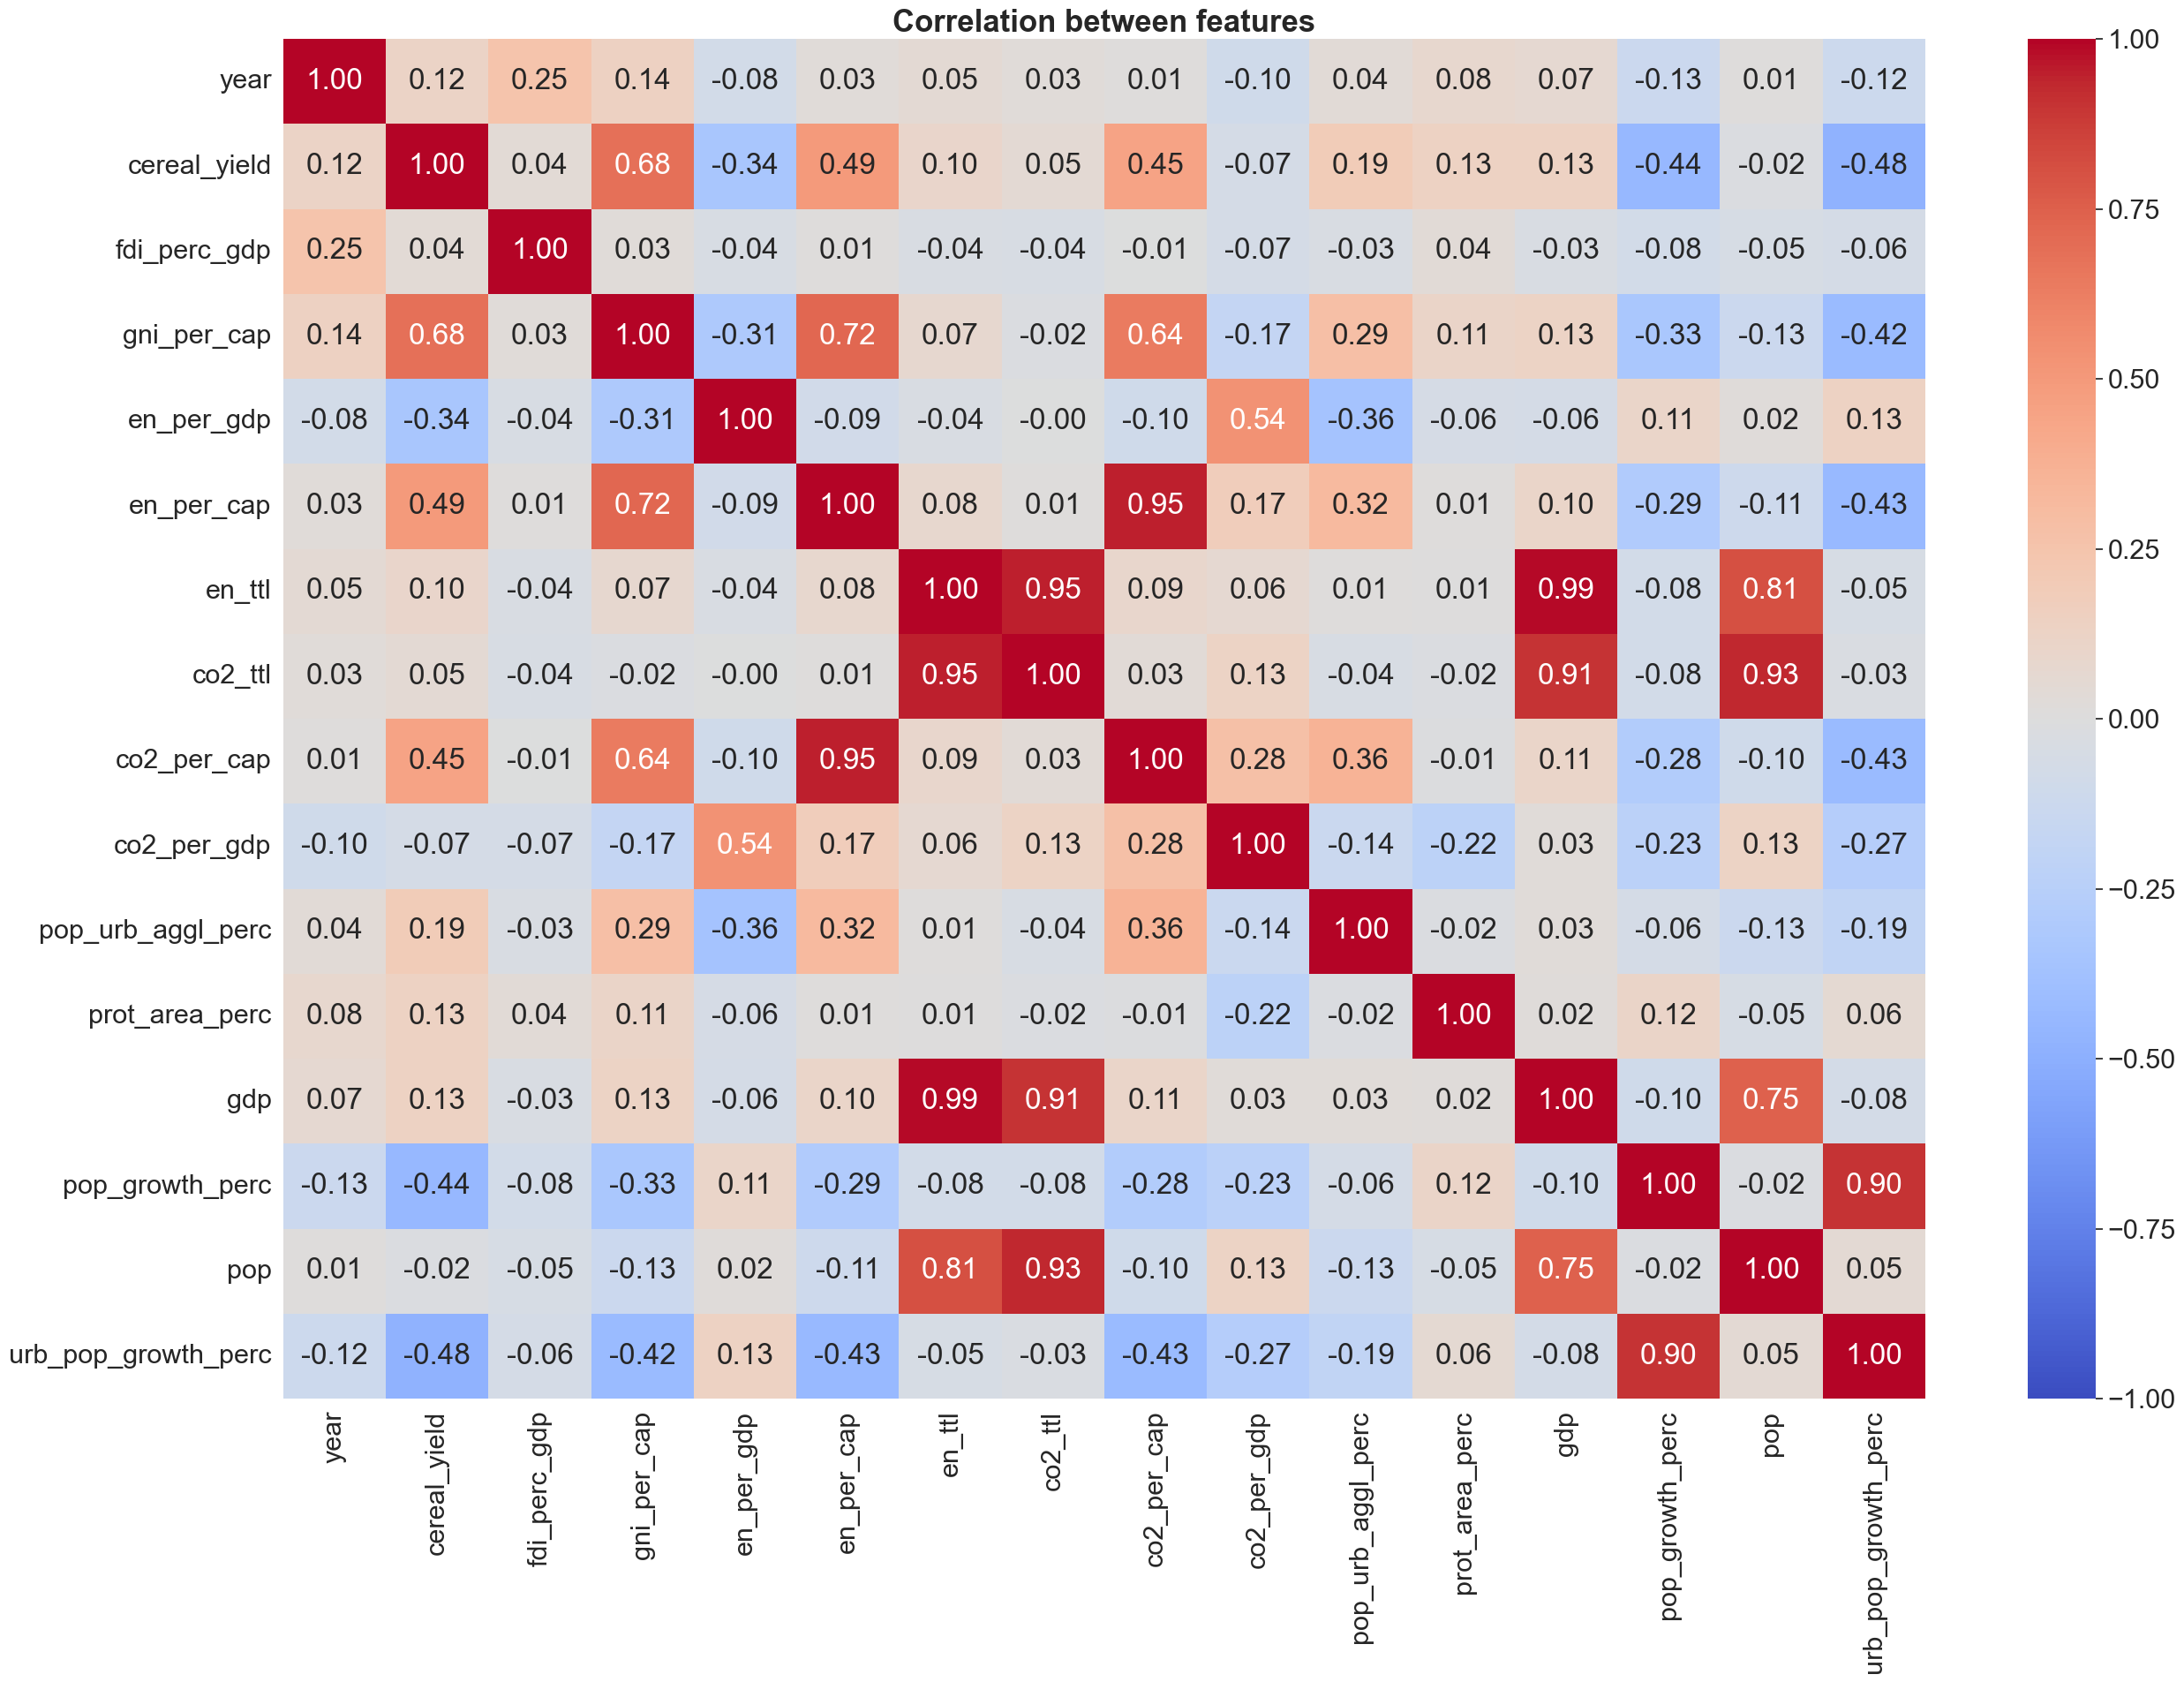

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

# select all features
features_all = data[['country', 'year', 'cereal_yield', 'fdi_perc_gdp', 'gni_per_cap',
                     'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap',
                     'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                     'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

# Select only numeric columns for correlation analysis
features_numeric = features_all.select_dtypes(include='number')

# plot a correlation of all features
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(features_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold')
plt.show()

sns.set(font_scale=1)


When comparing the dependencies of co2_ttl, co2_per_cap and co2_per_gdp with other features, co2_per_cap correlates with a bigger amount of other variables. It also represents the CO2 emissions independently of population size, making it more representative when analyzing and comparing the emissions of countries with different sizes and population counts.

Since the chosen variables are referred to the population count, it wouldn't make much sence to take the variable pop (indicating the population count) - this can be also seen from the weak correlation coefficient.

Taking this into account, the features pop, en_per_gdp, en_ttl, co2_per_gdp, co2_ttl will be removed from further analysis

In [310]:
features = features_all[['country','cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

# 6. Prepare the visualizations
## Plotting preparation
### Ensure easier labeling of the plots
In order to make the labeling of the variables within plots easier in the code, a dictionary with the column names and variable labels to use on axes is defined:

In [312]:

# a dictionary with feature labels
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }


## Choose a subset of countries to plot
The big amount of data points will result in slower processing of the plot and in a less clear representation. This can be avoided by choosing roughly half of the countries just for the paired scatter plot:

In [316]:

# select only rows for half of the countries chosen randomly in order to ensure better visibility
chosen_countries=['LIC', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features[features['country'].isin(chosen_countries)]


## 7. Create plots and visualizations
The visualization is organized in a way that global overview of the data and dependencies is presented first, followed by more and more detailed representations of the more relevant relationships.

### 7.1 A global look onto all relationships
Scatter plots of all chosen variables and countries will give a first impression of possible trends:

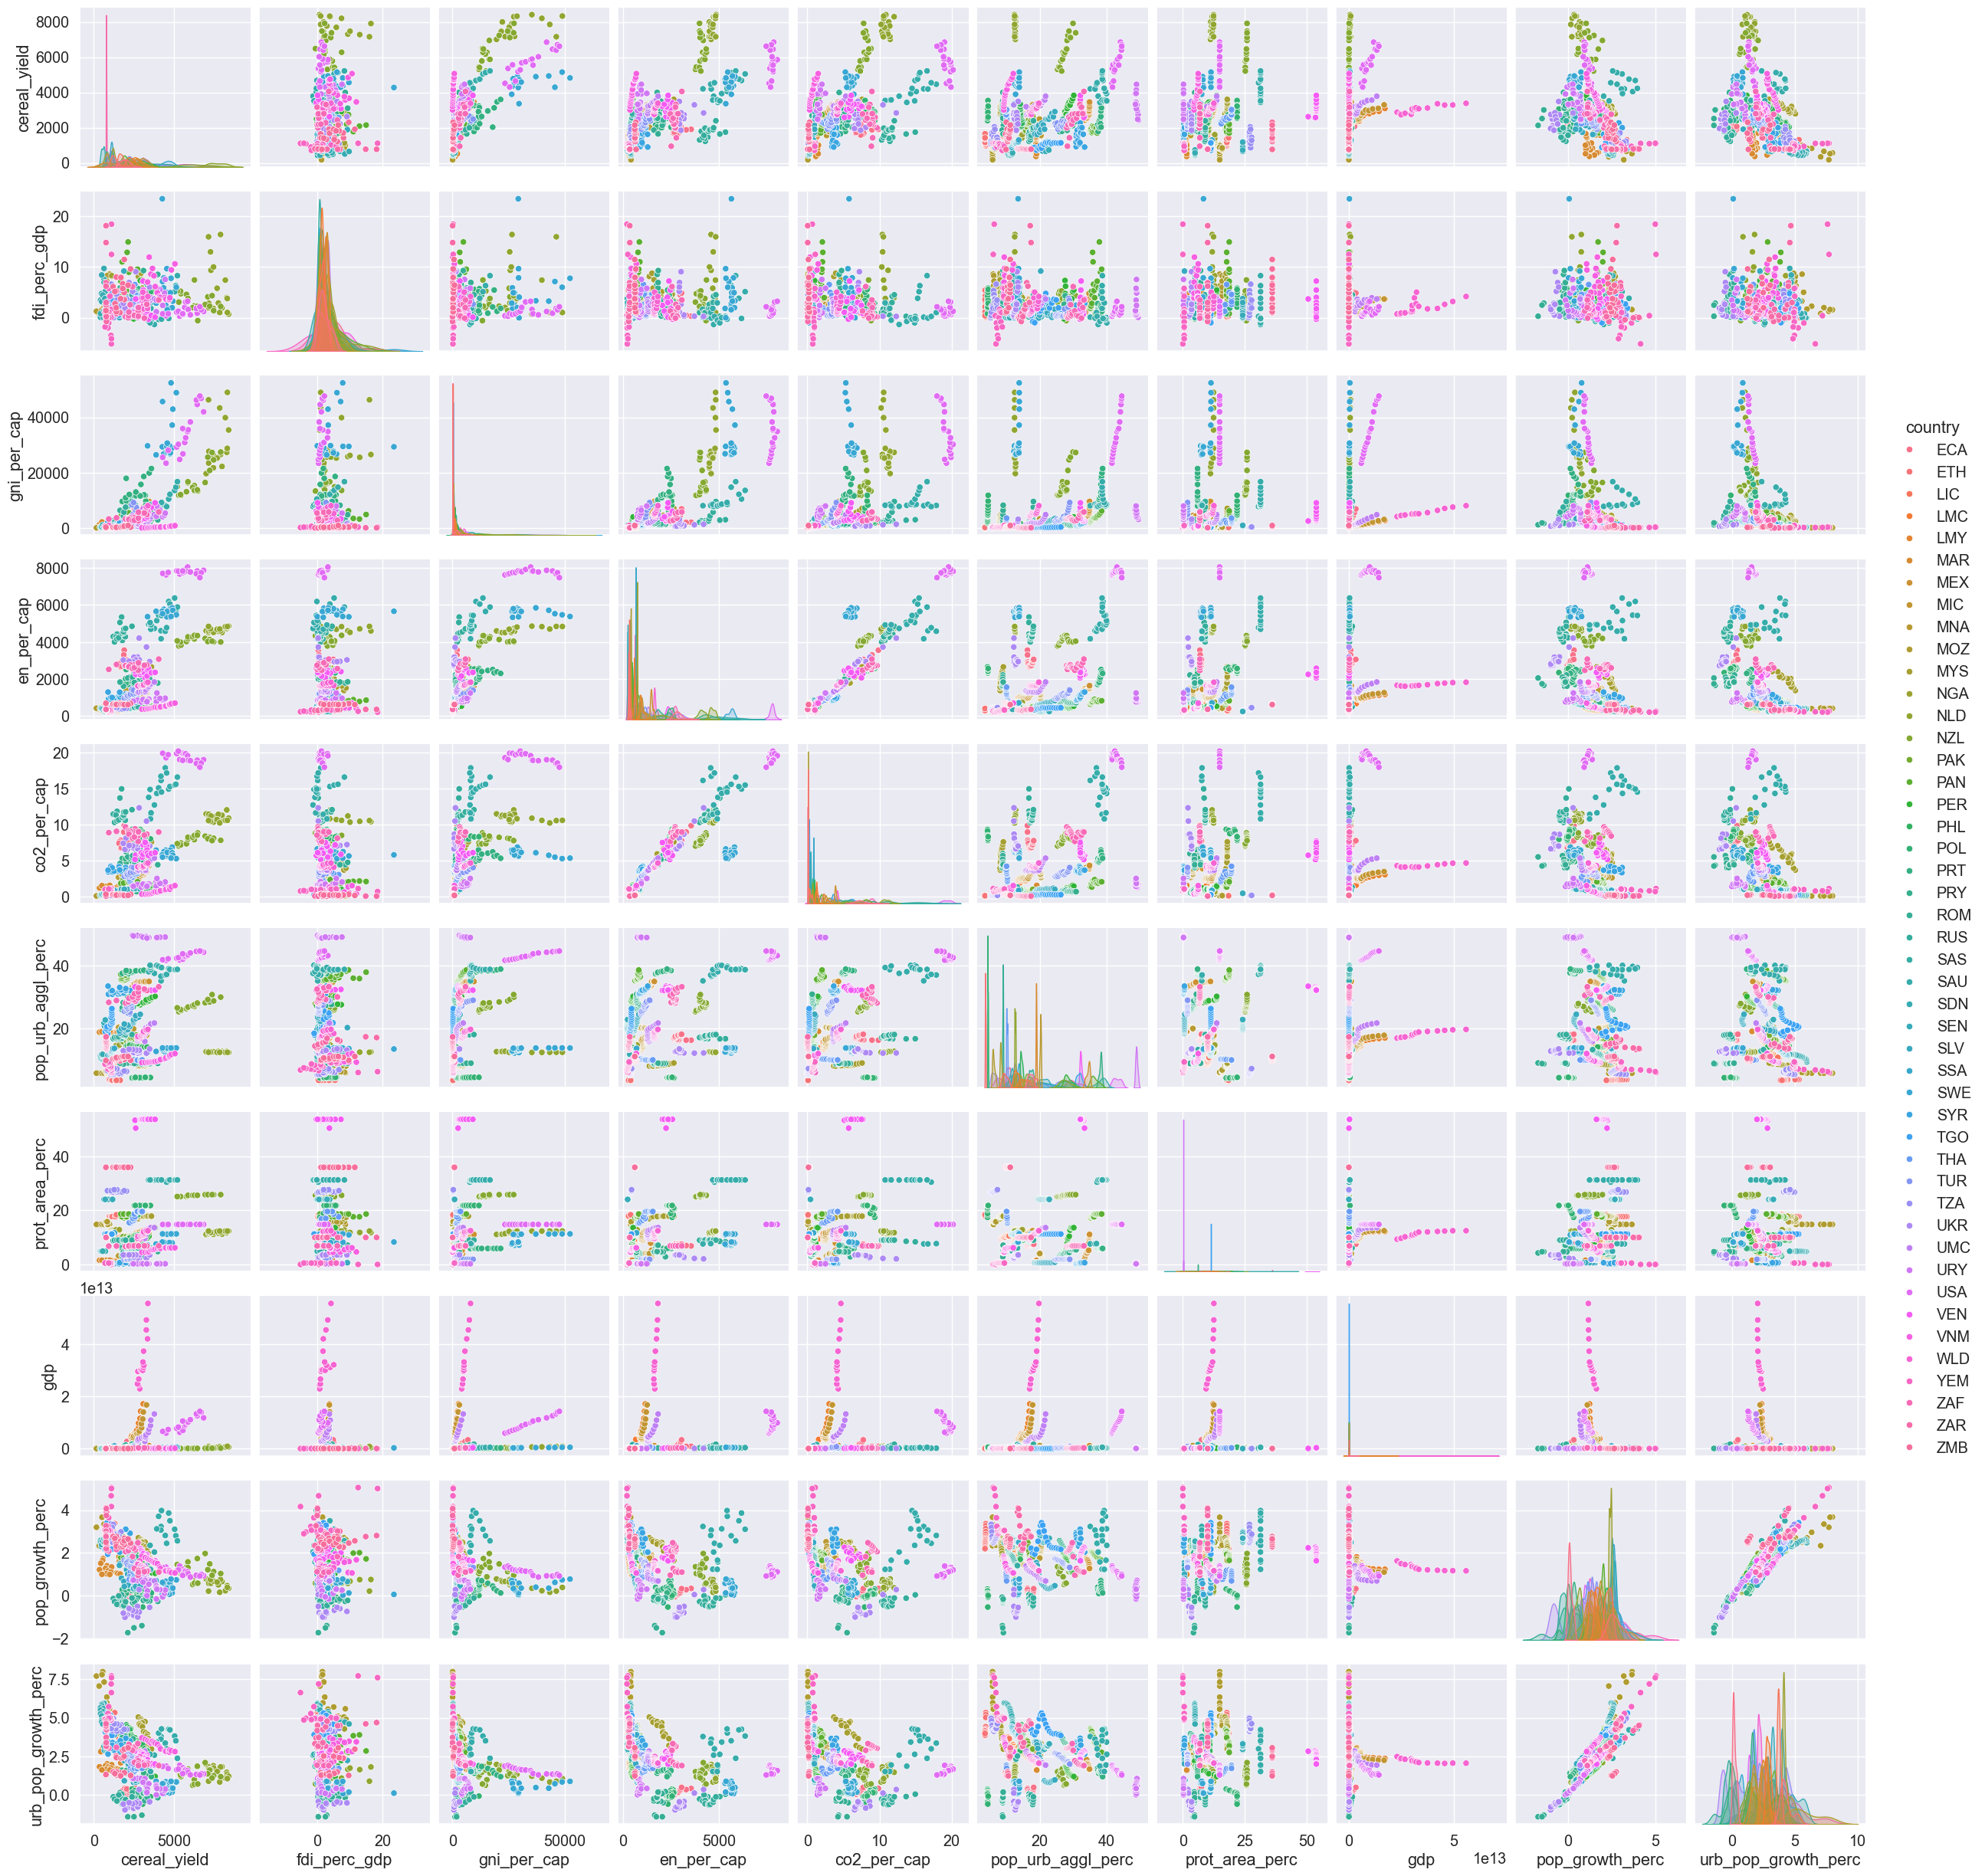

In [319]:

sns.set(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')
plt.show()

## 7.2 A closer look onto chosen plots
These dependencies will be explored in more detail for all available countries in the following plots:

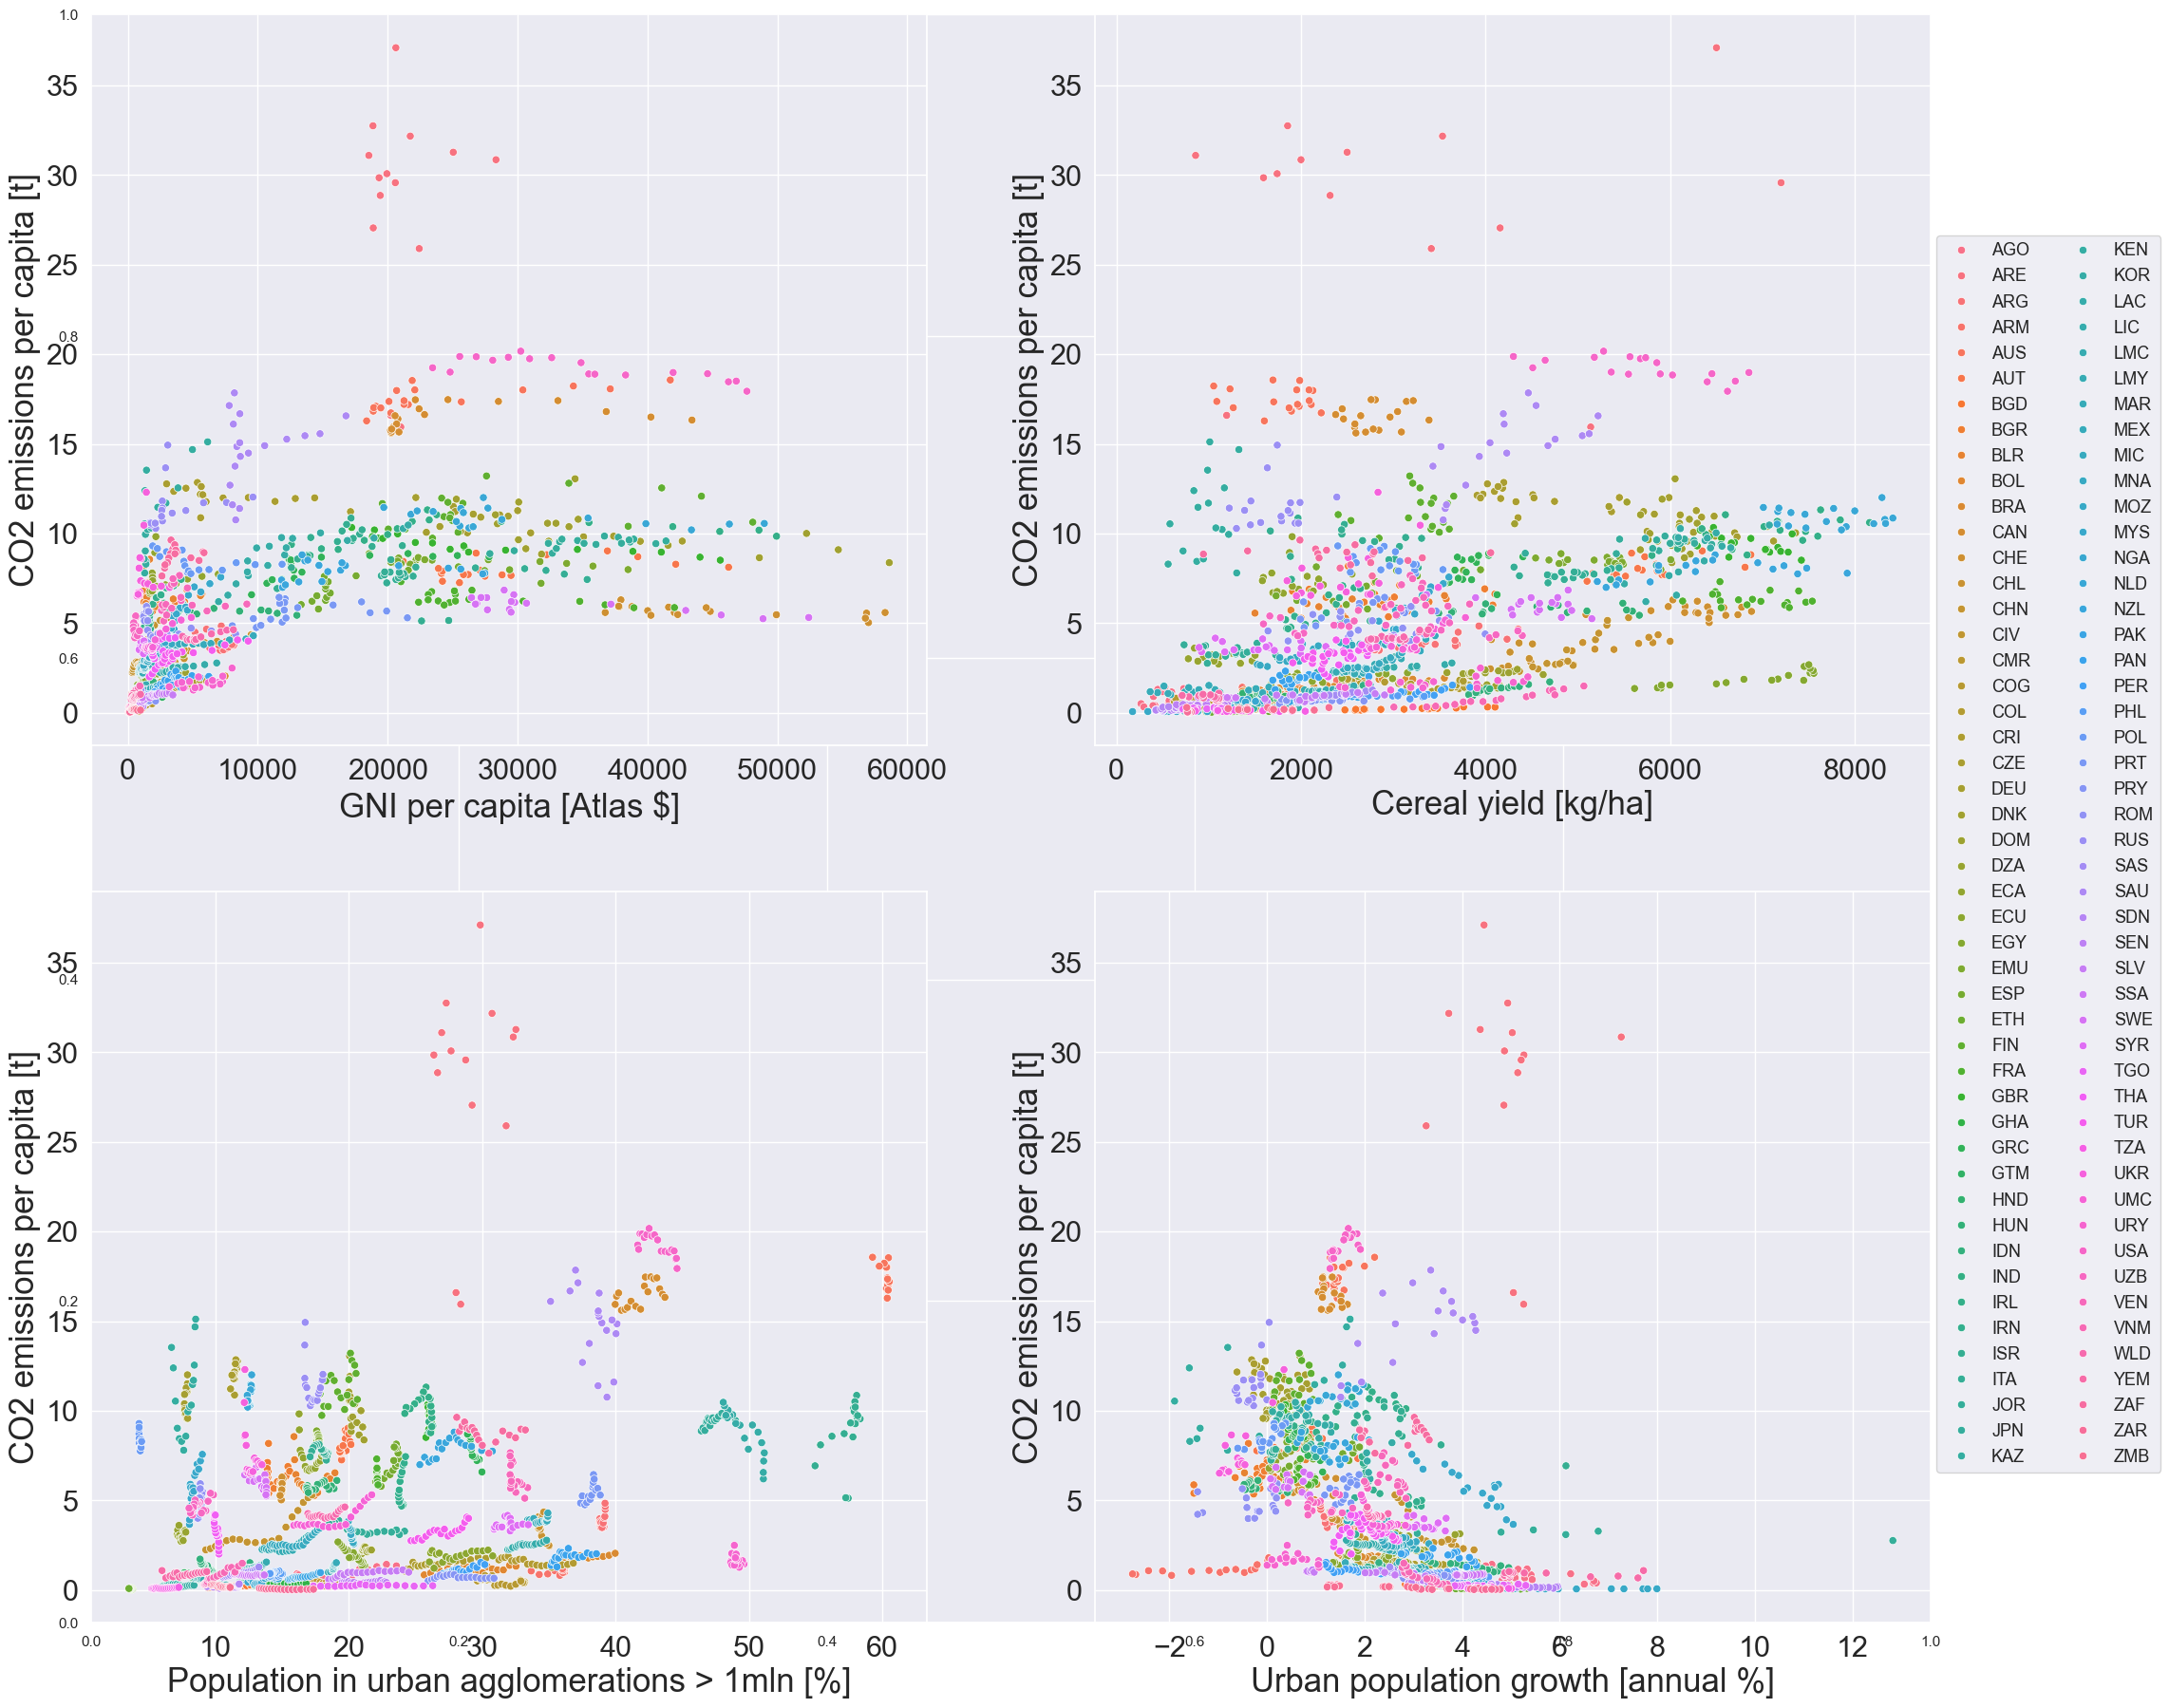

In [322]:
# set default settings of the seaborn library
sns.set()

# plot all scatterplots

fig,ax=plt.subplots(figsize=(25,22))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1


# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in [['gni_per_cap',labels_dict['gni_per_cap']], ['cereal_yield',labels_dict['cereal_yield']], ['pop_urb_aggl_perc',labels_dict['pop_urb_aggl_perc']], ['urb_pop_growth_perc',labels_dict['urb_pop_growth_perc']]]:
    
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_cap", data=features, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dict['co2_per_cap'], fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()

As a whole, all four diagrams exhibit not only local tendencies for each country (in most cases at least), which are similar, but also global trends for all data points. Worth noticing is also that these trends are nonlinear, but with different structure in all plots, implying different kinds of theoretical contribution to the DV CO2 emissions per capita. This could be a valuable asset for the future prediction of the DV.

Outliers
Another aspect that draws the attention is the group of outlier points of the same tome of orange for the range of CO2 emissions per capita between 25t and 40t. All of these belong to the data series corresponding to the country of United Arab Emirates (country code ARE). Other outliers corresponding to certain countries (same color) can also be identified, which do not disturb the global trends that much though. After removing the rows corresponding to ARE, the plots look as follows:

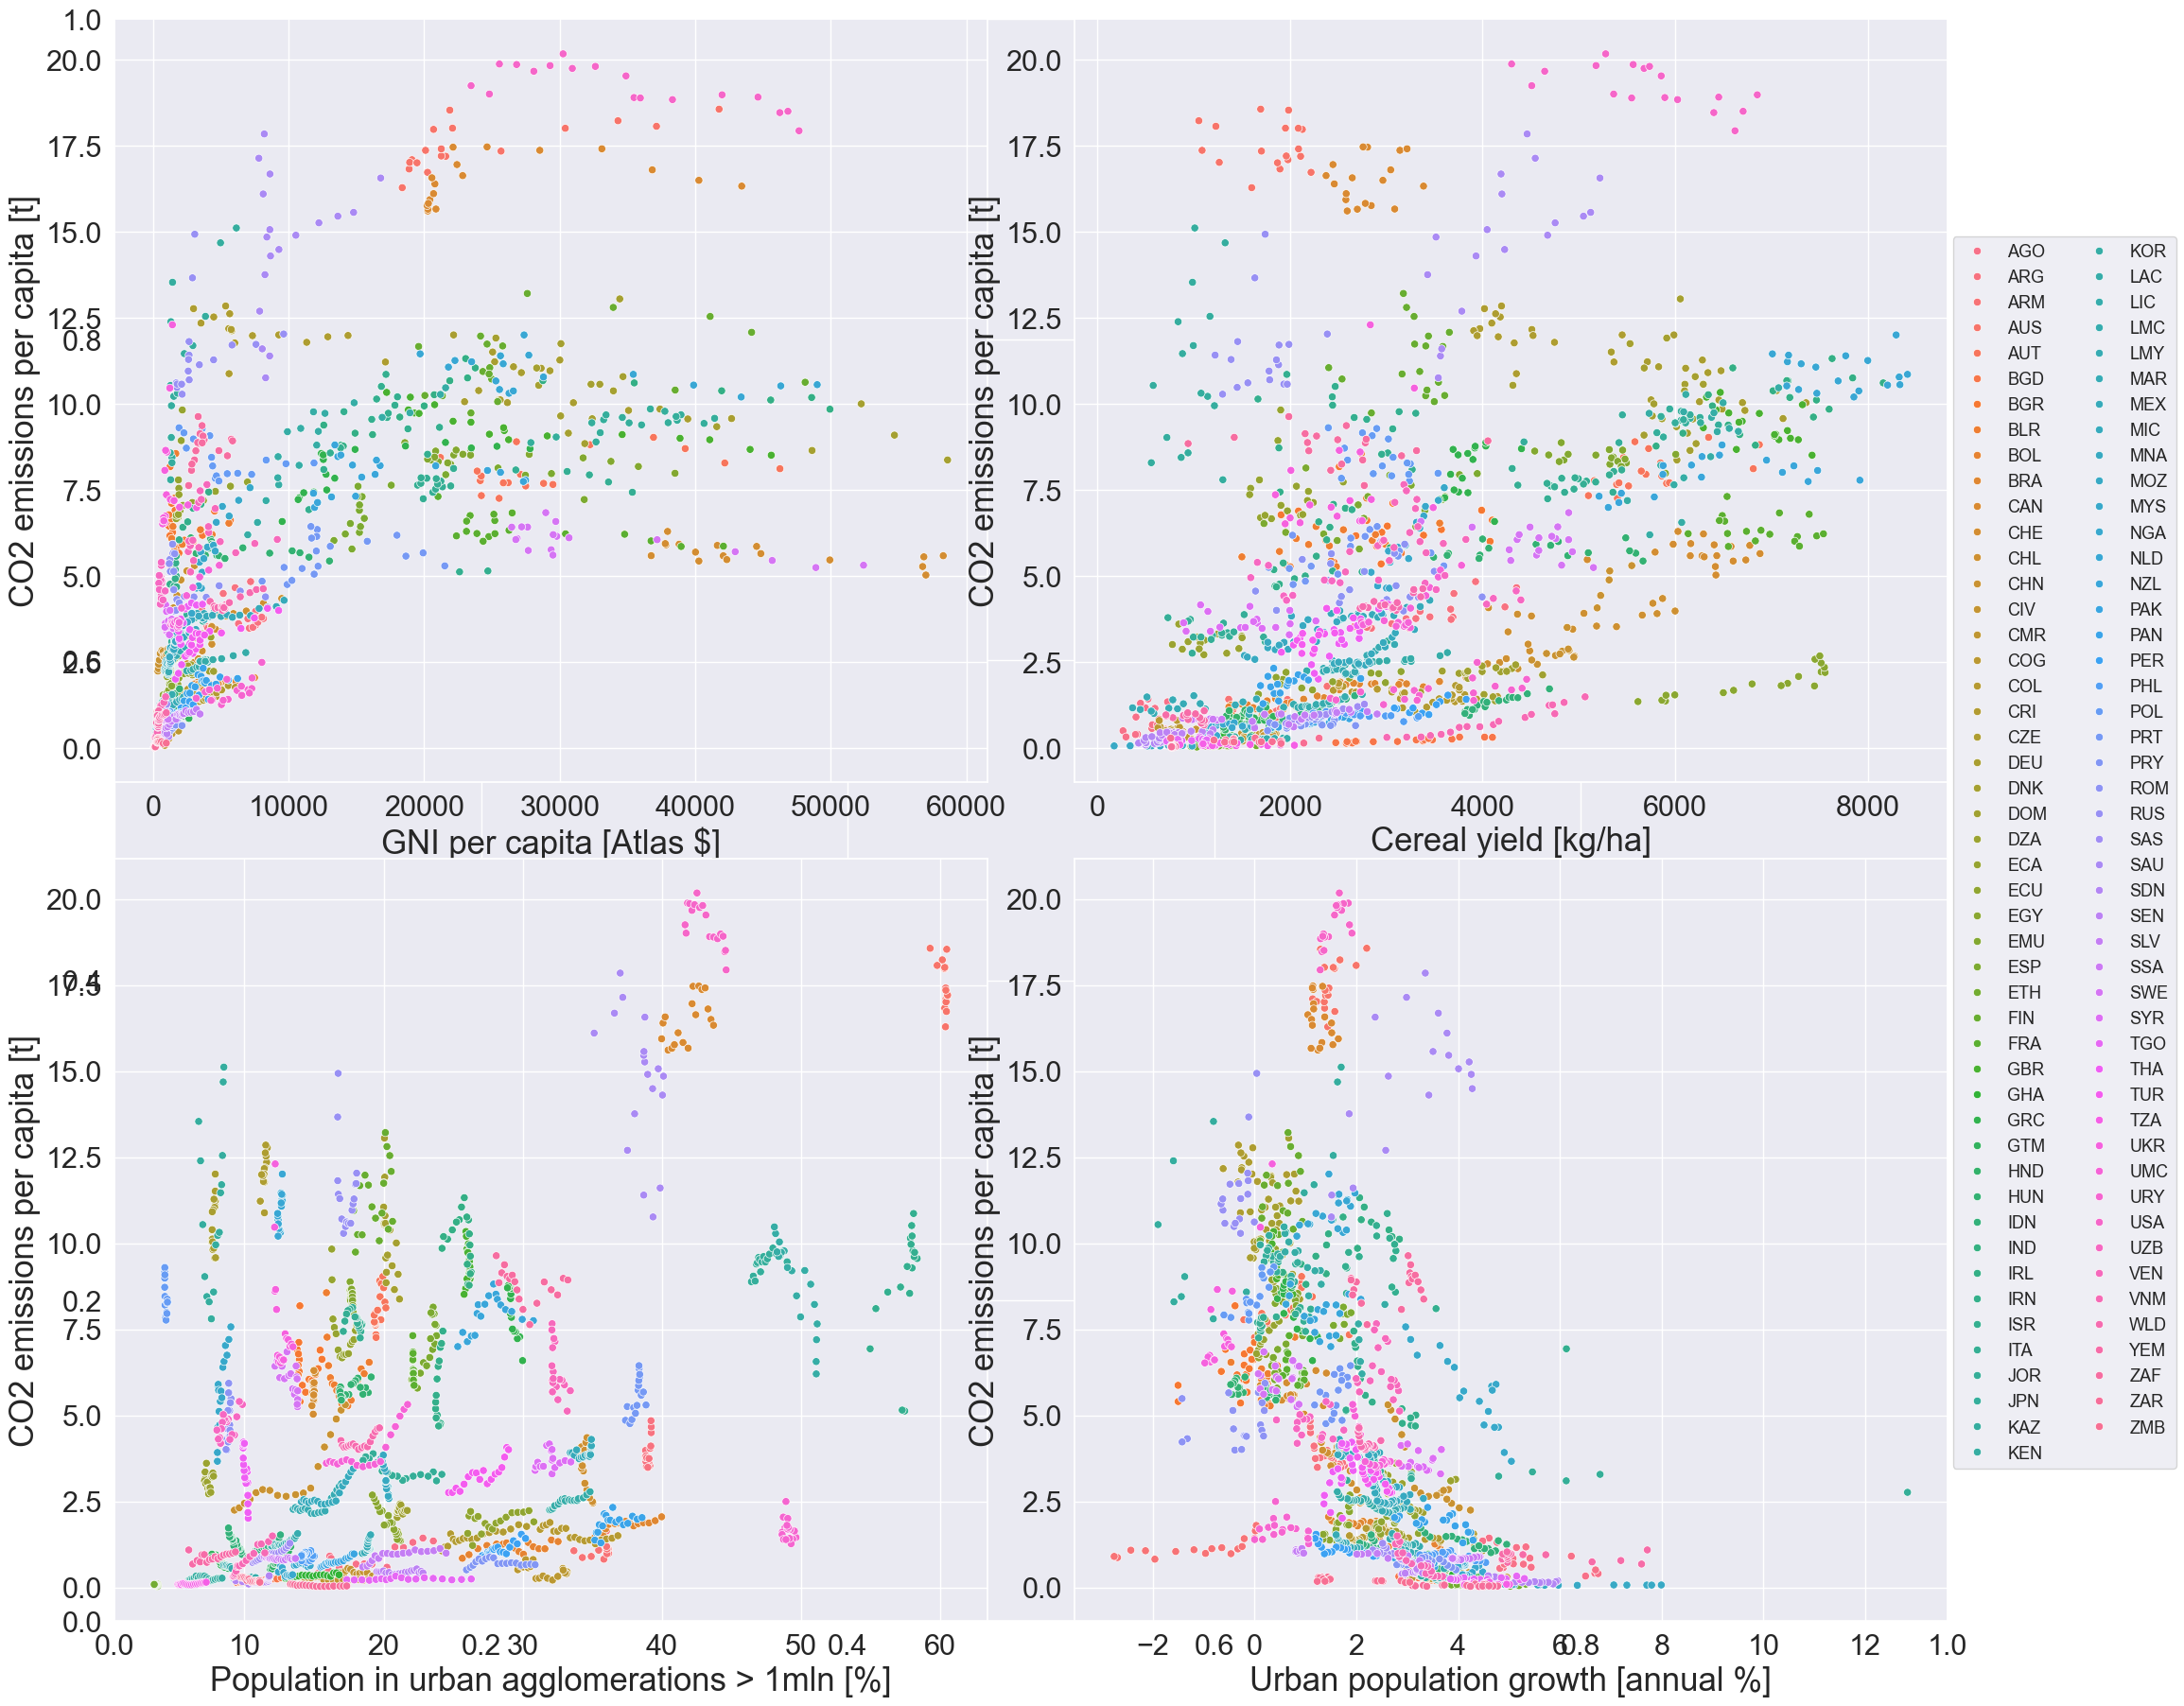

In [325]:
# remove the ARE outliers
features = features[features['country']!="ARE"]

# plot all scatterplots

fig,ax=plt.subplots(figsize=(25,22))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1

# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in [['gni_per_cap',labels_dict['gni_per_cap']], ['cereal_yield',labels_dict['cereal_yield']], ['pop_urb_aggl_perc',labels_dict['pop_urb_aggl_perc']], ['urb_pop_growth_perc',labels_dict['urb_pop_growth_perc']]]:
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_cap", data=features, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dict['co2_per_cap'], fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()

After removing the outliers of a single country, the trends have become even more visible.

The following plot shows the relationsip between 4 variables:

Text(107.65314062499998, 0.5, 'CO2 emissions per capita [t]')

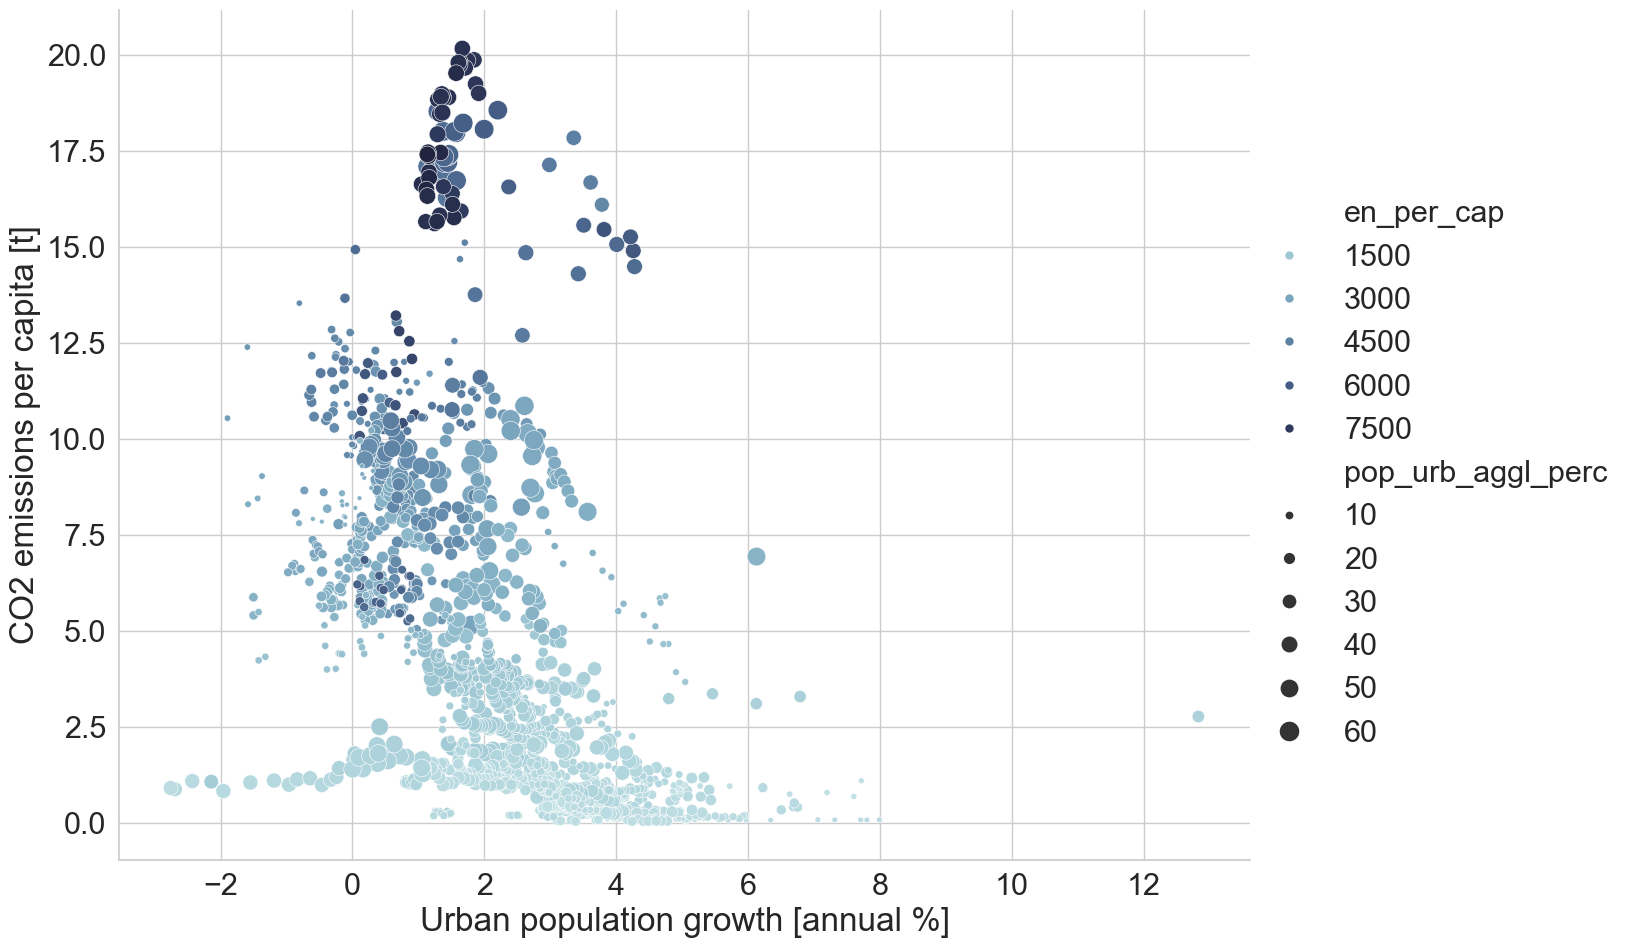

In [328]:
# 4d plot

sns.set(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features,
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])

## Visualization Conclusions

- Valuable insights were gained by plotting targeted relationships relevant for further predictive analysis.

- Variables representing CO₂ emissions and energy use — when represented per capita — show stronger relationships with multiple features and will be prioritized in further analysis.

- The population count feature is therefore not useful anymore and has been removed from the analysis.

- CO₂ emissions per capita exhibit a strong linear relationship with energy use, and nonlinear relationships with other variables.

- Most visualizations reveal both local trends (specific to single countries) and global trends (across all observations). In certain cases, global trends are further divided into distinct paths, indicating clusters or groups of countries.

- Groups of outliers with the same color (corresponding to specific countries) were detected. The most pronounced outliers, deviating from global trends, originated from the United Arab Emirates (country code: ARE). This observation should be considered during data selection for predictive analysis.

- The presence of pronounced nonlinearities and clustering among certain countries indicates that some machine learning algorithms are more appropriate than others. Algorithms capable of handling nonlinear relationships and clusters (such as Random Forest) are preferable over purely linear algorithms (like Linear Regression) for subsequent predictive analysis.
